## **Modelos de Redes Neuronales para Clasificación y Regresión Combinadas**
## CI-0163   Análisis de Grandes Volúmenes de Datos
## Daniel Ricardo Ramírez Umaña, B45675
***

Algunos modelos requieren para sus predicciones que estas puedan ser variables numéricas o categóricas. Para esto podemos usar un enfoque basado en desarrolar modelos predictivos y de clasificación sobre los mismos datos y usar modelos de forma secuencial, o bien se puede usar un enfoque llamado **multi-output model** que se basa en desarrollar un único modelo de red neuronal que pueda predecir tanto un valor numérico como una etiqueta de clase a partir de la misma entrada. Este es relativamente fácil de desarrolar y de evaluar utilizano bibliotecas modernas de aprendizaje.

### **Modelo Único de Regresión y Clasificación**

Para esto podemos hacer uso de dos enfoques, uno de estos es realizar la regresión y la clasificación por aparte y de forma secuencial, o bien usar un modelo que combine ambos tipos de clasificación a la vez.

#### **Separar los Modelos de Regresión y de Clasificación**

Se importan las librerías

In [9]:
# regression mlp model for the abalone dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Descargamos y observamos un resumen de la información del dataset de Abalone

In [10]:
# load and summarize the abalone dataset
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(4177, 9)
   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


##### **Modelo de Regresión**

Separamos las columnas en elementos de entrada y de salida

In [11]:
# split into input (X) and output (y) variables
X, y = dataset[:, 1:-1], dataset[:, -1]
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

Dividimos el dataset entre 67% de entrenamiento y 33% de testeo

In [12]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Definimos el modelo de Red Neuronal\
El modelo tendrá dos capas ocultas, la primera con 20 nodos y la segunda con 10 nodos, ambas utilizando activación ReLU e inicialización de pesos "he normal" (una buena práctica). El número de capas y nodos se ha elegido de forma arbitraria.\
La capa de salida tendrá un único nodo para predecir un valor numérico y una función de activación lineal.

In [13]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

Ahora entrenamos el modelo para minimizar el error medio cuadrado (MSE)

In [14]:
# compile the keras model
model.compile(loss='mse', optimizer='adam')

Ahora se entrena el modelo por 150 épocas con 32 muestras de minilotes escogidas aleatoriamente

In [15]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
88/88 - 0s - loss: 55.4883
Epoch 2/150
88/88 - 0s - loss: 15.8084
Epoch 3/150
88/88 - 0s - loss: 9.9737
Epoch 4/150
88/88 - 0s - loss: 9.1230
Epoch 5/150
88/88 - 0s - loss: 8.3607
Epoch 6/150
88/88 - 0s - loss: 7.7211
Epoch 7/150
88/88 - 0s - loss: 7.2214
Epoch 8/150
88/88 - 0s - loss: 6.8821
Epoch 9/150
88/88 - 0s - loss: 6.6411
Epoch 10/150
88/88 - 0s - loss: 6.4969
Epoch 11/150
88/88 - 0s - loss: 6.3881
Epoch 12/150
88/88 - 0s - loss: 6.3041
Epoch 13/150
88/88 - 0s - loss: 6.2595
Epoch 14/150
88/88 - 0s - loss: 6.1845
Epoch 15/150
88/88 - 0s - loss: 6.1192
Epoch 16/150
88/88 - 0s - loss: 6.0665
Epoch 17/150
88/88 - 0s - loss: 6.0096
Epoch 18/150
88/88 - 0s - loss: 5.9453
Epoch 19/150
88/88 - 0s - loss: 5.9029
Epoch 20/150
88/88 - 0s - loss: 5.8394
Epoch 21/150
88/88 - 0s - loss: 5.7832
Epoch 22/150
88/88 - 0s - loss: 5.7369
Epoch 23/150
88/88 - 0s - loss: 5.7198
Epoch 24/150
88/88 - 0s - loss: 5.6401
Epoch 25/150
88/88 - 0s - loss: 5.6144
Epoch 26/150
88/88 - 0s - loss: 

Finalmente evaluaremos el modelo y reporteremos le MSE Absoluto

In [16]:
# evaluate on test set
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

MAE: 1.493


##### **Modelo de Clasificación**

Las dependencias

In [18]:
# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Para ello es necesario asignar primero un número entero distinto para cada valor del "anillo", empezando por 0 y terminando por el número total de "clases" menos uno.

Esto se puede conseguir utilizando el LabelEncoder.

También podemos registrar el número total de clases como el número total de valores de clase únicos codificados, que serán necesarios para el modelo más adelante.

In [19]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))

Definimos el modelo y cambiamos el número de salidas para que iguale el número de clases y usar la función de activación softmax que es común para la clasificación multiclase.

In [20]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

Se minimiza la función de pérdida de entropía cruzada categórica dispersa, apropiada para tareas de clasificación multiclase con etiquetas de clase codificadas en números enteros

In [21]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

Evaluamos el modelo con accuracy

In [23]:
# evaluate on test set
yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.001


#### **Combinar los Modelos de Regresión y de Clasificación**

Las dependencias

In [24]:
# mlp for combined regression and classification predictions on the abalone dataset
from numpy import unique
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

Cargamos el dataset

In [25]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dataframe = read_csv(url, header=None)
dataset = dataframe.values

Dividimos el dataset en elementos de entrada y de salida

In [26]:
# split into input (X) and output (y) variables
X, y = dataset[:, 1:-1], dataset[:, -1]
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

Cambiamos las variables categóricas a numéricas

In [27]:
# encode strings to integer
y_class = LabelEncoder().fit_transform(y)
n_class = len(unique(y_class))

Dividimos el dataset entre el que será de entrenamiento y el que será de testeo

In [28]:
# split data into train and test sets
X_train, X_test, y_train, y_test, y_train_class, y_test_class = train_test_split(X, y, y_class, test_size=0.33, random_state=1)

Definimos el modelo a utilizar

In [29]:
# input
visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(hidden1)

Capa de salida de regresión que tiene un solo nodo y una función de activación lineal

In [30]:
# regression output
out_reg = Dense(1, activation='linear')(hidden2)

capa de salida de clasificación que tiene un nodo para cada clase que se predice y utiliza una función de activación softmax.

In [31]:
# classification output
out_clas = Dense(n_class, activation='softmax')(hidden2)

Se define una única capa de entrada y dos capas de salida

In [32]:
# define model
model = Model(inputs=visible, outputs=[out_reg, out_clas])

In [33]:
# compile the keras model
model.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

Graficamos el modelo que tenemos

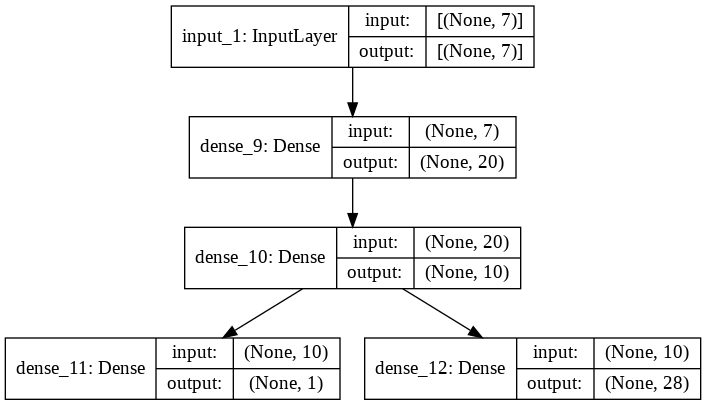

In [34]:
# plot graph of model
plot_model(model, to_file='model.png', show_shapes=True)

Ajustamos el modelo al dataset en untotal de 150 épocas

In [35]:
# fit the keras model on the dataset
model.fit(X_train, [y_train,y_train_class], epochs=150, batch_size=32, verbose=2)

Epoch 1/150
88/88 - 1s - loss: 107.2401 - dense_11_loss: 103.9796 - dense_12_loss: 3.2605
Epoch 2/150
88/88 - 0s - loss: 79.1596 - dense_11_loss: 76.1710 - dense_12_loss: 2.9886
Epoch 3/150
88/88 - 0s - loss: 44.5070 - dense_11_loss: 41.7761 - dense_12_loss: 2.7309
Epoch 4/150
88/88 - 0s - loss: 15.3975 - dense_11_loss: 12.8223 - dense_12_loss: 2.5752
Epoch 5/150
88/88 - 0s - loss: 10.6050 - dense_11_loss: 8.0857 - dense_12_loss: 2.5194
Epoch 6/150
88/88 - 0s - loss: 10.3967 - dense_11_loss: 7.8894 - dense_12_loss: 2.5072
Epoch 7/150
88/88 - 0s - loss: 10.2270 - dense_11_loss: 7.7291 - dense_12_loss: 2.4979
Epoch 8/150
88/88 - 0s - loss: 10.0379 - dense_11_loss: 7.5494 - dense_12_loss: 2.4885
Epoch 9/150
88/88 - 0s - loss: 9.7899 - dense_11_loss: 7.3168 - dense_12_loss: 2.4731
Epoch 10/150
88/88 - 0s - loss: 9.5693 - dense_11_loss: 7.1265 - dense_12_loss: 2.4428
Epoch 11/150
88/88 - 0s - loss: 9.3636 - dense_11_loss: 6.9723 - dense_12_loss: 2.3913
Epoch 12/150
88/88 - 0s - loss: 9.1882

Ahora se realizan algunas predicciones

In [36]:
# make predictions on test set
yhat1, yhat2 = model.predict(X_test)

Ahora se calcula el error para el modelo de regresión

In [38]:
# calculate error for regression model
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

MAE: 1.505


Finalmente se evalúa la predicción del modelo

In [39]:
# evaluate accuracy for classification model
yhat2 = argmax(yhat2, axis=-1).astype('int')
acc = accuracy_score(y_test_class, yhat2)
print('Accuracy: %.3f' % acc)

Accuracy: 0.273


## **Qué no me queda claro**

En cuanto al modelo que combina tanto la Regresión como la Clasificación en cunjunto, no me queda claro exactamente como es que este los combina, no sé si es que se ejecutan a la vez o de forma secuencial pero intercalados.

## **Breve Reporte**

#### **Resumen del tema tratado:** 

Existen formas para poder evaluar modelos cuyos valores de salida pueden combinar tanto clasificación como regresión, para esto es importante aplicar los conosimientos de las funciones de activación para las capas tanto internas como de salida y luego evaluar estos modelos.

#### **Comentarios sobre algo aprendido:**

Cuando se requiere tanto variables categóricas como numéricas para aplicar a la vez clasificación y regresión, es posible que las predicciones diverjan y es por esto que un modelo que combine ambas en lugar de efectuarlas por separado será una mejor opción en estos casos.

#### **Dudas sobre el tema tratado:**

Dado que no me quedó claro en el segundo ejemplo como es que este trabajaba con los modelos de regresión y de clasificación si ambos a la vez o de forma secuencíal, creo que lo mejor es buscar más ejemplos y así teniendo distintas perspectivas poder tener una mejor comprensión de este tema.
